In [1]:
import pandas as pd 
import matplotlib.pyplot
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt 
import numpy as np

# Task from last week
**Reviewing continents merge **

Open both dataframes, find out the size of each of them and display the first 10 rows

In [2]:
dfGdp = pd.read_csv("gdpPerCapita1.csv")

In [3]:
dfLife = pd.read_csv("lifeExpectancy1.csv")

Repeating the steps from last week to create a consistent column

In [4]:
def upper(text):
    return text.upper()

In [5]:
dfLife["Country Code"] = dfLife["Country Code"].apply(upper)
dfLife

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.569366,65.988024,66.365537,66.713976,67.044293,67.369756,...,74.526756,74.675732,74.818146,74.953537,75.081390,75.205756,75.328659,75.451098,75.573585,NaN
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.328512,32.777439,33.219902,33.657878,34.092878,34.525390,...,57.833829,58.225024,58.603683,58.970829,59.327951,59.679610,60.028268,60.374463,60.717171,NaN
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.984829,33.386220,33.787585,34.188463,34.590341,34.992220,...,49.435732,49.847390,50.251024,50.654171,51.059317,51.464000,51.866171,52.266878,52.666098,NaN
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.254366,63.273463,64.162854,64.887098,65.438195,65.827390,...,76.470293,76.652073,76.840366,77.036951,77.240585,77.443976,77.640463,77.830463,78.014463,NaN
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.852780,47.432448,48.010502,48.591241,49.175538,49.758702,...,69.152549,69.361987,69.560038,69.749303,69.935670,70.125413,70.319844,70.517163,70.714065,NaN
6,United Arab Emirates,ARE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,52.243220,53.286561,54.327000,55.363512,56.392585,57.405707,...,76.111171,76.307756,76.494780,76.675244,76.851195,77.024146,77.195634,77.368171,77.541244,NaN
7,Argentina,ARG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.215537,65.338512,65.432610,65.509390,65.582415,65.668683,...,75.009049,75.166268,75.324561,75.484976,75.649049,75.816244,75.986098,76.158610,76.334220,NaN
8,Armenia,ARM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.863463,66.284390,66.709854,67.137854,67.565415,67.991537,...,73.764659,73.945000,74.095829,74.226341,74.342829,74.452098,74.561366,74.675707,74.797122,NaN
9,American Samoa,ASM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Join the dataframes together on Country Code

In [6]:
df = pd.merge(dfGdp, dfLife, how="left", on="Country Code", suffixes=("_Gdp", "_LE"))
df.sample(5)

,Country Name_Gdp,Country Code,1960_Gdp,1961_Gdp,1962_Gdp,1963_Gdp,1964_Gdp,1965_Gdp,1966_Gdp,1967_Gdp,...,2007_LE,2008_LE,2009_LE,2010_LE,2011_LE,2012_LE,2013_LE,2014_LE,2015_LE,2016_LE
208,Sierra Leone,SLE,140.180258,140.749664,145.035842,145.323932,152.696905,145.304139,149.435676,136.593437,...,45.488366,46.427634,47.350220,48.228951,49.034732,49.749098,50.363122,50.878780,51.308171,NaN
43,Colombia,COL,245.197466,268.097371,283.917439,268.324398,322.472169,302.454042,276.488780,281.969889,...,72.705512,72.907171,73.096951,73.277854,73.454805,73.630780,73.809732,73.993146,74.182024,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.470293,76.652073,76.840366,77.036951,77.240585,77.443976,77.640463,77.830463,78.014463,NaN
74,Fiji,FJI,285.542501,287.329144,291.539707,296.772935,310.872997,317.072947,316.179587,333.309188,...,68.843415,69.022024,69.202854,69.384366,69.565000,69.743220,69.917927,70.089122,70.256268,NaN
227,Chad,TCD,104.472101,109.129606,114.582174,116.777461,120.821473,125.975859,128.343151,130.961012,...,48.559220,48.951585,49.393171,49.862073,50.331951,50.781390,51.191488,51.555805,51.873317,NaN


Open the new continents data

In [7]:
dfContinents = pd.read_csv("continentsClean.csv")
dfContinents.head()

,code,country-code,region,sub-region,region-code,sub-region-code
0,AFG,4,Asia,Southern Asia,142.0,34.0
1,ALA,248,Europe,Northern Europe,150.0,154.0
2,ALB,8,Europe,Southern Europe,150.0,39.0
3,DZA,12,Africa,Northern Africa,2.0,15.0
4,ASM,16,Oceania,Polynesia,9.0,61.0


Check the columns

In [8]:
dfContinents.columns

Index(['code', 'country-code', 'region', 'sub-region', 'region-code',
       'sub-region-code'],
      dtype='object')

Select the columns that you want to merge

In [9]:
dfContinents = dfContinents[['code', 'region', 'sub-region']]
dfContinents.head()

,code,region,sub-region
0,AFG,Asia,Southern Asia
1,ALA,Europe,Northern Europe
2,ALB,Europe,Southern Europe
3,DZA,Africa,Northern Africa
4,ASM,Oceania,Polynesia


Rename the columns (noting that you want to merge on Country Code again)

In [10]:
dfContinents.columns = ['Country Code','region','sub-region']
dfContinents.head()

,Country Code,region,sub-region
0,AFG,Asia,Southern Asia
1,ALA,Europe,Northern Europe
2,ALB,Europe,Southern Europe
3,DZA,Africa,Northern Africa
4,ASM,Oceania,Polynesia


Merge the dataframes

In [11]:
df = pd.merge(dfContinents, df, how="left", on="Country Code")
df.sample(5)

,Country Code,region,sub-region,Country Name_Gdp,1960_Gdp,1961_Gdp,1962_Gdp,1963_Gdp,1964_Gdp,1965_Gdp,...,2007_LE,2008_LE,2009_LE,2010_LE,2011_LE,2012_LE,2013_LE,2014_LE,2015_LE,2016_LE
77,PYF,Oceania,Polynesia,French Polynesia,NaN,NaN,NaN,NaN,NaN,1889.323290,...,74.891976,75.186659,75.453463,75.695390,75.917024,76.127024,76.334073,76.541683,76.752415,NaN
113,JOR,Asia,Western Asia,Jordan,NaN,NaN,NaN,NaN,NaN,511.561963,...,72.961171,73.120244,73.278293,73.435829,73.591854,73.746415,73.900000,74.052146,74.203341,NaN
236,UMI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,TCA,Americas,Caribbean,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,TZA,Africa,Eastern Africa,Tanzania,NaN,NaN,NaN,NaN,NaN,NaN,...,58.077780,59.314707,60.509512,61.625610,62.632098,63.520902,64.291829,64.943902,65.487488,NaN


In [12]:
df.columns

Index(['Country Code', 'region', 'sub-region', 'Country Name_Gdp', '1960_Gdp',
       '1961_Gdp', '1962_Gdp', '1963_Gdp', '1964_Gdp', '1965_Gdp',
       ...
       '2007_LE', '2008_LE', '2009_LE', '2010_LE', '2011_LE', '2012_LE',
       '2013_LE', '2014_LE', '2015_LE', '2016_LE'],
      dtype='object', length=121)

# This week
## Recap by completing this notebook

Group your dataframe by region, sub-region and country name. Add a comment to explain this is what you've done

In [13]:
df.groupby(["region", "sub-region", "Country Name_Gdp"]).sum()

1960_Gdp  \
region  sub-region                Country Name_Gdp                        
Africa  Eastern Africa            Burundi                     70.349079   
                                  Comoros                           NaN   
                                  Djibouti                          NaN   
                                  Eritrea                           NaN   
                                  Ethiopia                          NaN   
                                  Kenya                       97.621531   
                                  Madagascar                 131.993036   
                                  Malawi                      45.034089   
                                  Mauritius                         NaN   
                                  Mozambique                        NaN   
                                  Rwanda                      40.566881   
                                  Seychelles                 288.058159   
                                  Somalia                           NaN   
                                  South Sudan                       NaN   
                                  Tanzania                          NaN   
                                  Uganda                      62.315122   
                                  Zambia                     234.166194   
                                  Zimbabwe                   280.994586   
        Middle Africa             Angola                            NaN   
                                  Cameroon                   119.534187   
                                  Central African Republic    74.595944   
                                  Chad                       104.472101   
                                  Congo, Dem. Rep.           220.314063   
                                  Congo, Rep.                127.004746   
                                  Equatorial Guinea                 NaN   
                                  Gabon                      283.400465   
                                  Sao Tome and Principe             NaN   
        Northern Africa           Algeria                    244.824806   
                                  Egypt, Arab Rep.                  NaN   
                                  Libya                             NaN   
...                                                                 ...   
Europe  Southern Europe           Slovenia                          NaN   
                                  Spain                      396.392253   
        Western Europe            Austria                    935.460427   
                                  Belgium                   1273.691659   
                                  France                    1338.299606   
                                  Germany                           NaN   
                                  Liechtenstein                     NaN   
                                  Luxembourg                2242.015817   
                                  Monaco                            NaN   
                                  Netherlands               1068.784587   
                                  Switzerland               1787.360348   
Oceania Australia and New Zealand Australia                 1809.311452   
                                  New Zealand               2312.949992   
        Melanesia                 Fiji                       285.542501   
                                  New Caledonia                     NaN   
                                  Papua New Guinea           114.636032   
                                  Solomon Islands                   NaN   
                                  Vanuatu                           NaN   
        Micronesia                Guam                              NaN   
                                  Kiribati                          NaN   
                                  Marshall Islands                  NaN   
             

Filter your dataframe to only look at Europe - set this as a new variable

In [14]:
dfEurope = df[df['region'] == 'Europe']
dfEurope.head()

,Country Code,region,sub-region,Country Name_Gdp,1960_Gdp,1961_Gdp,1962_Gdp,1963_Gdp,1964_Gdp,1965_Gdp,...,2007_LE,2008_LE,2009_LE,2010_LE,2011_LE,2012_LE,2013_LE,2014_LE,2015_LE,2016_LE
1,ALA,Europe,Northern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALB,Europe,Southern Europe,Albania,NaN,NaN,NaN,NaN,NaN,NaN,...,76.470293,76.652073,76.840366,77.036951,77.240585,77.443976,77.640463,77.830463,78.014463,NaN
5,AND,Europe,Southern Europe,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,AUT,Europe,Western Europe,Austria,935.460427,1031.815004,1087.834243,1167.000532,1269.412583,1374.53214,...,80.180488,80.431707,80.331707,80.580488,80.982927,80.936585,81.136585,81.490244,81.843902,NaN
20,BLR,Europe,Eastern Europe,Belarus,NaN,NaN,NaN,NaN,NaN,NaN,...,70.207317,70.456098,70.407317,70.404878,70.553659,71.965854,72.470732,72.970732,73.624390,NaN


Select only the sub-region and 205 GDP columns from your dataset, group them by the mean of sub-region

In [15]:
dfEuropePlot = dfEurope[["sub-region", "2015_Gdp"]]
dfEuropePlot = dfEuropePlot.groupby(["sub-region"]).mean()
dfEuropePlot

,2015_Gdp
sub-region,
Eastern Europe,9376.612309
Northern Europe,42083.271822
Southern Europe,14512.540214
Western Europe,55559.726204


Plot it as a bar chart

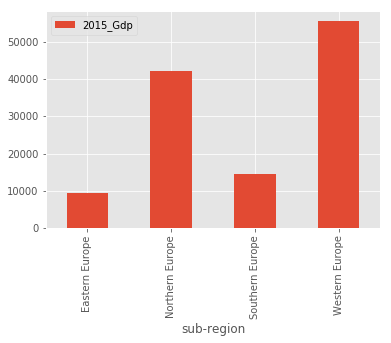

In [16]:
dfEuropePlot.plot.bar()
plt.show()

Add a title, make it bigger, add a y axis label

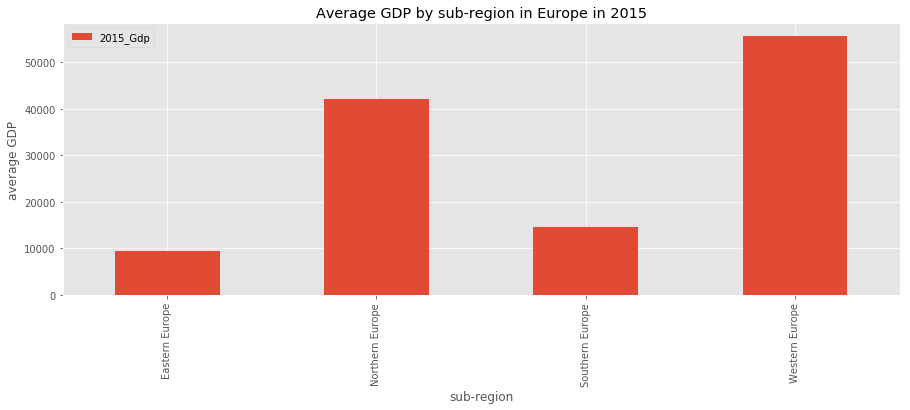

In [17]:
dfEuropePlot.plot.bar(figsize=(15,5), title="Average GDP by sub-region in Europe in 2015").set_ylabel("average GDP")
plt.show()
plt.savefig('something.png')

### Understanding your data

In [18]:
dfEurope.describe()

,1960_Gdp,1961_Gdp,1962_Gdp,1963_Gdp,1964_Gdp,1965_Gdp,1966_Gdp,1967_Gdp,1968_Gdp,1969_Gdp,...,2007_LE,2008_LE,2009_LE,2010_LE,2011_LE,2012_LE,2013_LE,2014_LE,2015_LE,2016_LE
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,41.000000,41.000000,41.000000,41.000000,0.0
mean,1187.665800,1273.030283,1370.222997,1484.126979,1661.820706,1808.612629,1956.770809,2061.776778,2100.663581,2287.420450,...,76.815433,77.155605,77.424911,77.732927,78.154663,78.198788,78.483334,78.779173,78.952340,NaN
std,532.295698,548.309884,582.049200,617.618596,698.030649,745.724829,812.123312,825.354597,838.254432,911.796824,...,4.215810,4.168995,3.982815,3.943643,3.885930,3.726531,3.665845,3.739197,3.715521,NaN
min,360.499299,382.729947,407.852844,432.511730,468.781082,520.910659,575.007681,646.822720,719.080492,795.759371,...,67.586829,67.949268,68.684634,68.841220,69.683902,70.072195,70.578780,70.743659,70.908537,NaN
25%,804.492623,887.336745,990.260152,1126.019337,1222.544540,1304.453817,1402.442354,1533.692877,1651.939377,1813.388126,...,73.733939,74.000384,74.606171,74.803299,75.003713,75.063415,75.565854,75.763415,75.960976,NaN
50%,1273.691659,1350.197673,1438.523233,1535.023729,1707.503938,1850.954769,1959.627830,2034.189050,2185.248659,2178.035250,...,78.441463,78.645122,78.848780,79.260976,80.203659,80.124390,80.321951,81.078049,81.090244,NaN
75%,1414.982269,1503.537013,1667.247430,1775.582655,2013.243077,2243.931595,2443.259791,2644.786647,2662.117492,2875.235844,...,80.032317,80.386585,80.508537,80.733537,80.986585,81.104878,81.441463,81.707317,81.843902,NaN
max,2242.015817,2222.366366,2315.846527,2492.545346,2758.943466,3007.597978,3240.611037,3490.550337,3683.313694,3972.002749,...,82.506098,82.831707,82.995543,83.159379,83.323215,82.917073,83.078049,83.229268,83.490244,NaN


Isolate the highest and lowest 2007 life expectancies in Europe

In [19]:
dfEurope["2007_LE"].describe()

count    42.000000
mean     76.815433
std       4.215810
min      67.586829
25%      73.733939
50%      78.441463
75%      80.032317
max      82.506098
Name: 2007_LE, dtype: float64

In [20]:
dfEurope["2007_LE"].max()

82.506097560000001

Filter from the original dataframe

In [21]:
dfEuropeHighLe = df[(df['region'] == 'Europe') & (df['2007_LE'] >= 80.00)]
dfEuropeHighLe

,Country Code,region,sub-region,Country Name_Gdp,1960_Gdp,1961_Gdp,1962_Gdp,1963_Gdp,1964_Gdp,1965_Gdp,...,2007_LE,2008_LE,2009_LE,2010_LE,2011_LE,2012_LE,2013_LE,2014_LE,2015_LE,2016_LE
14,AUT,Europe,Western Europe,Austria,935.460427,1031.815004,1087.834243,1167.000532,1269.412583,1374.532140,...,80.180488,80.431707,80.331707,80.580488,80.982927,80.936585,81.136585,81.490244,81.843902,NaN
75,FRA,Europe,Western Europe,France,1338.299606,1440.554330,1585.917267,1752.964403,1919.266718,2042.240384,...,81.112195,81.214634,81.414634,81.663415,82.114634,81.968293,82.219512,82.670732,82.670732,NaN
101,ISL,Europe,Northern Europe,Iceland,1414.982269,1418.125870,1562.230730,1831.705656,2297.920643,2723.520950,...,81.453659,81.609756,81.751220,81.897561,82.358537,82.917073,82.060976,82.860976,82.860976,NaN
109,ITA,Europe,Southern Europe,Italy,804.492623,887.336745,990.260152,1126.019337,1222.544540,1304.453817,...,81.434146,81.485366,81.636585,82.036585,82.187805,82.239024,82.690244,83.090244,83.490244,NaN
127,LIE,Europe,Western Europe,Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,...,81.295122,82.682927,81.500000,81.841463,81.792683,82.382927,82.260976,82.073171,82.073171,NaN
156,NLD,Europe,Western Europe,Netherlands,1068.784587,1159.392357,1240.677894,1328.036649,1541.947365,1708.096356,...,80.097561,80.251220,80.548780,80.702439,81.204878,81.104878,81.304878,81.707317,81.707317,NaN
165,NOR,Europe,Northern Europe,Norway,1441.755660,1560.324931,1667.247430,1775.582655,1937.884614,2164.468823,...,80.395122,80.592683,80.795122,80.997561,81.295122,81.451220,81.751220,82.100000,82.100000,NaN
192,SMR,Europe,Southern Europe,San Marino,NaN,NaN,NaN,NaN,NaN,NaN,...,82.506098,82.831707,82.995543,83.159379,83.323215,NaN,NaN,NaN,NaN,NaN
208,ESP,Europe,Southern Europe,Spain,396.392253,450.053289,520.206131,609.487384,675.241639,774.761609,...,80.873171,81.175610,81.475610,81.626829,82.475610,82.426829,83.078049,83.229268,83.380488,NaN
214,SWE,Europe,Northern Europe,Sweden,1983.106544,2147.229311,2315.846527,2492.545346,2758.943466,3007.597978,...,80.900000,81.100000,81.351220,81.451220,81.802439,81.704878,81.956098,82.253659,82.551220,NaN


In [22]:
dfEuropeLowLe = df[(df['region'] == 'Europe') & (df['2007_LE'] <= 70.00)]
dfEuropeLowLe

,Country Code,region,sub-region,Country Name_Gdp,1960_Gdp,1961_Gdp,1962_Gdp,1963_Gdp,1964_Gdp,1965_Gdp,...,2007_LE,2008_LE,2009_LE,2010_LE,2011_LE,2012_LE,2013_LE,2014_LE,2015_LE,2016_LE
145,MDA,Europe,Eastern Europe,Moldova,NaN,NaN,NaN,NaN,NaN,NaN,...,68.209902,68.630024,69.143293,69.709268,70.271098,70.772488,71.172049,71.455878,71.626439,NaN
182,RUS,Europe,Eastern Europe,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,...,67.586829,67.949268,68.684634,68.841220,69.683902,70.072195,70.578780,70.743659,70.908537,NaN
232,UKR,Europe,Eastern Europe,Ukraine,NaN,NaN,NaN,NaN,NaN,NaN,...,68.222195,68.251463,69.190000,70.265366,70.809268,70.944146,71.159512,71.186585,71.189512,NaN


Find the largest and smallest subsets by column

In [23]:
dfEurope.nlargest(5, "2015_LE", keep='first')

,Country Code,region,sub-region,Country Name_Gdp,1960_Gdp,1961_Gdp,1962_Gdp,1963_Gdp,1964_Gdp,1965_Gdp,...,2007_LE,2008_LE,2009_LE,2010_LE,2011_LE,2012_LE,2013_LE,2014_LE,2015_LE,2016_LE
109,ITA,Europe,Southern Europe,Italy,804.492623,887.336745,990.260152,1126.019337,1222.544540,1304.453817,...,81.434146,81.485366,81.636585,82.036585,82.187805,82.239024,82.690244,83.090244,83.490244,NaN
208,ESP,Europe,Southern Europe,Spain,396.392253,450.053289,520.206131,609.487384,675.241639,774.761609,...,80.873171,81.175610,81.475610,81.626829,82.475610,82.426829,83.078049,83.229268,83.380488,NaN
215,CHE,Europe,Western Europe,Switzerland,1787.360348,1971.316323,2131.391652,2294.182847,2501.293190,2620.475547,...,81.741463,81.992683,82.043902,82.246341,82.695122,82.697561,82.797561,83.197561,83.197561,NaN
101,ISL,Europe,Northern Europe,Iceland,1414.982269,1418.125870,1562.230730,1831.705656,2297.920643,2723.520950,...,81.453659,81.609756,81.751220,81.897561,82.358537,82.917073,82.060976,82.860976,82.860976,NaN
75,FRA,Europe,Western Europe,France,1338.299606,1440.554330,1585.917267,1752.964403,1919.266718,2042.240384,...,81.112195,81.214634,81.414634,81.663415,82.114634,81.968293,82.219512,82.670732,82.670732,NaN


In [24]:
dfEurope.nsmallest(5, "2015_LE", keep='first')

,Country Code,region,sub-region,Country Name_Gdp,1960_Gdp,1961_Gdp,1962_Gdp,1963_Gdp,1964_Gdp,1965_Gdp,...,2007_LE,2008_LE,2009_LE,2010_LE,2011_LE,2012_LE,2013_LE,2014_LE,2015_LE,2016_LE
182,RUS,Europe,Eastern Europe,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,...,67.586829,67.949268,68.684634,68.841220,69.683902,70.072195,70.578780,70.743659,70.908537,NaN
232,UKR,Europe,Eastern Europe,Ukraine,NaN,NaN,NaN,NaN,NaN,NaN,...,68.222195,68.251463,69.190000,70.265366,70.809268,70.944146,71.159512,71.186585,71.189512,NaN
145,MDA,Europe,Eastern Europe,Moldova,NaN,NaN,NaN,NaN,NaN,NaN,...,68.209902,68.630024,69.143293,69.709268,70.271098,70.772488,71.172049,71.455878,71.626439,NaN
20,BLR,Europe,Eastern Europe,Belarus,NaN,NaN,NaN,NaN,NaN,NaN,...,70.207317,70.456098,70.407317,70.404878,70.553659,71.965854,72.470732,72.970732,73.624390,NaN
122,LVA,Europe,Northern Europe,Latvia,NaN,NaN,NaN,NaN,NaN,NaN,...,71.019512,72.419512,73.080488,73.482927,73.575610,73.778049,73.982927,74.124390,74.124390,NaN


## Task
### On average, in 1980 how much longer did people live in Northern Europe compared with South America?

Select the columns you need to answer this question

In [25]:
df1980 = df[["sub-region", "1980_LE", "Country Name_Gdp"]]
df1980.head()

,sub-region,1980_LE,Country Name_Gdp
0,Southern Asia,41.867537,Afghanistan
1,Northern Europe,NaN,NaN
2,Southern Europe,70.235976,Albania
3,Northern Africa,58.164024,Algeria
4,Polynesia,NaN,American Samoa


Filter to only see Northern Europe

In [26]:
df1980 = df1980[(df1980['sub-region'] == 'Northern Europe')]
df1980

,sub-region,1980_LE,Country Name_Gdp
1,Northern Europe,NaN,NaN
60,Northern Europe,74.101707,Denmark
69,Northern Europe,68.914073,Estonia
72,Northern Europe,NaN,Faroe Islands
74,Northern Europe,73.440000,Finland
91,Northern Europe,NaN,NaN
101,Northern Europe,76.846585,Iceland
106,Northern Europe,72.549366,Ireland
107,Northern Europe,NaN,Isle of Man
112,Northern Europe,NaN,NaN


Use Numpy to only look at rows which are not null - so that we don't skew our average. You'll need to make sure you've imported at the top of your notebook. You can also do this in Pandas https://pandas.pydata.org/pandas-docs/stable/generated/pandas.notnull.html

In [27]:
df1980 = df1980[np.isfinite(df1980['1980_LE'])]
df1980

,sub-region,1980_LE,Country Name_Gdp
60,Northern Europe,74.101707,Denmark
69,Northern Europe,68.914073,Estonia
74,Northern Europe,73.440000,Finland
101,Northern Europe,76.846585,Iceland
106,Northern Europe,72.549366,Ireland
122,Northern Europe,68.808537,Latvia
128,Northern Europe,70.482195,Lithuania
165,Northern Europe,75.671707,Norway
214,Northern Europe,75.740976,Sweden
234,Northern Europe,73.675610,United Kingdom


Calculate the mean of 1980_LE

In [28]:
df1980["1980_LE"].mean()

73.023075610999996

Make it reusable - we can take the lines above and put them into a function. The only things we need to change are two swap in some variables instead of our values.

First - copy your dataframe

In [29]:
df1 = df.copy()

Take each line of your above calculation and paste it into a new cell - don't comment it out, this is just to show the process

In [30]:
# df1980 = df[["sub-region", "1980_LE", "Country Name_Gdp"]]
# df1980 = df1980[(df1980['sub-region'] == 'Northern Europe')]
# df1980 = df1980[np.isfinite(df1980['1980_LE'])]
# df1980["1980_LE"].mean()

In the same cell, add def to the topline and name your function. Indent everything below this

In [31]:
#def avgLifeExpectancy     
    # df1980 = df[["sub-region", "1980_LE", "Country Name_Gdp"]]
    # df1980 = df1980[(df1980['sub-region'] == 'Northern Europe')]
    # df1980 = df1980[np.isfinite(df1980['1980_LE'])]
    # df1980["1980_LE"].mean()

We want this function to work for any dataframe, any region and any year - so give these as variables on the top line. Don't forget to add round brackets and a colon

In [32]:
#def avgLifeExpectancy(df, subRegionName, year):     
    # df1980 = df[["sub-region", "1980_LE", "Country Name_Gdp"]]
    # df1980 = df1980[(df1980['sub-region'] == 'Northern Europe')]
    # df1980 = df1980[np.isfinite(df1980['1980_LE'])]
    # df1980["1980_LE"].mean()

Replace the values we used earlier with the variable names

In [33]:
# def avgLifeExpectancy(df, subRegionName, year):
#     df = df[['sub-region', year, "Country Name_Gdp"]]
#     df = df[(df['sub-region'] == subRegionName)]
#     df = df[np.isfinite(df[year])]
#     df[year].mean()

Add return to the last line - as you want your function to return the mean for that year

In [34]:
def avgLifeExpectancy(df, subRegionName, year):
    df = df[['sub-region', year, "Country Name_Gdp"]]
    df = df[(df['sub-region'] == subRegionName)]
    df = df[np.isfinite(df[year])]
    return df[year].mean()

Test it out. You can either declare your variables at the top of the cell, or you can substitute them in directly. Check the answer is the same as your earlier calculation

In [35]:
# subRegionName = "Northern Europe"
# year = "1980_LE"

northernEurope = avgLifeExpectancy(df1, "Northern Europe", "1980_LE")
northernEurope

73.023075610999996

Test on a different variable

In [36]:
avgLifeExpectancy(df1, "Southern Asia", "1980_LE")

52.635997290000006

In [37]:
southAmerica = avgLifeExpectancy(df1, "South America", "1980_LE")
southAmerica

64.326642274999998

Do a simple calculation to answer our question

In [38]:
answer = northernEurope - southAmerica

In [39]:
answer

8.6964333359999983

Remember you can also perform calculations on entire columns

In [40]:
a = df["1975_Gdp"].mean()
a

2670.8559208023075

In [41]:
b = df["1965_Gdp"].mean()
b

734.00874164053084

In [42]:
c = a - b
c

1936.8471791617767

## A new dataset
https://drive.google.com/open?id=0BxAMHhHjQFUgbEY5TGpMYXo4TTQ 

In [43]:
dfLa = pd.read_csv("/Users/sarahdean/workspace/learning/la_data.csv", encoding = "ISO-8859-1")
dfLa

,Local authority,Early years,Primary schools,Secondary schools,Special schools and alternative provision,Post-16 provision,Other education and community budget,TOTAL EDUCATION SERVICES,"Transport planning, policy and strategy",Structural maintenance,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,Bath & North East Somerset UA,"10,644","43,449","10,271","9,739","1,257","11,315","86,675",783,"3,068",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bristol UA,"29,961","92,020","50,207","24,905","9,855","21,252","228,200","1,925","1,494",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,South Gloucestershire UA,"15,080","87,474","9,549","15,095","6,244","12,828","146,270","2,935","1,733",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,North Somerset UA,"10,311","65,161","16,725","1,031",0,"4,691","97,919","1,303","1,333",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Luton UA,"19,493","87,271","29,078","15,297","1,985","19,101","172,225",-158,388,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Bedford UA,"9,740","52,543","12,556","8,197","1,710","7,000","91,746","1,584",505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Central Bedfordshire UA,"7,092","73,073","91,178","12,344","23,146","15,315","222,148","2,239",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Bracknell Forest UA,"4,184","44,275","35,273","11,614","1,638","5,047","102,031",812,110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,West Berkshire UA,"9,511","53,204","17,771","13,276","6,176","6,390","106,328",443,"1,310",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Reading UA,"12,379","48,664","7,776","12,239","2,735","8,175","91,968",998,719,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Find all the column names

In [44]:
dfLa.columns

Index(['Local authority', 'Early years', 'Primary schools',
       'Secondary schools', 'Special schools and alternative provision',
       'Post-16 provision', 'Other education and community budget',
       'TOTAL EDUCATION SERVICES', 'Transport planning, policy and strategy ',
       'Structural maintenance',
       ...
       'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248', 'Unnamed: 249',
       'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253',
       'Unnamed: 254', 'Unnamed: 255'],
      dtype='object', length=256)

In [45]:
lsLa = dfLa.columns.tolist()
lsLa

['Local authority',
 'Early years',
 'Primary schools',
 'Secondary schools',
 'Special schools and alternative provision',
 'Post-16 provision',
 'Other education and community budget',
 'TOTAL EDUCATION SERVICES',
 'Transport planning, policy and strategy ',
 'Structural maintenance',
 'Environmental, safety and routine maintenance',
 'Winter service',
 'Street lighting (including energy costs)',
 'Traffic management and road safety: congestion charging',
 'Traffic management and road safety: traffic management Ð bus lane enforcement',
 'Traffic management and road safety: road safety education and safe routes (including school crossing patrols)',
 'Traffic management and road safety: other',
 'Parking services',
 'Public transport: statutory concessionary fares',
 'Public transport: discretionary concessionary fares',
 'Public transport: support to operators',
 'Public transport: co-ordination',
 'Airports, harbours and toll facilities',
 'TOTAL HIGHWAYS AND TRANSPORT SERVICES',
 "C

We only want the columns which contain the word 'TOTAL' - there are a few ways to do this, but let's try list comprehension. http://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/ 

In [46]:
for c in dfLa.columns:
    if "TOTAL" in c:
        print(c)

TOTAL EDUCATION SERVICES
TOTAL HIGHWAYS AND TRANSPORT SERVICES
TOTAL CHILDREN'S SOCIAL CARE
TOTAL ADULT SOCIAL CARE
TOTAL PUBLIC HEALTH
TOTAL HOUSING SERVICES (GFRA only)
TOTAL CULTURAL AND RELATED SERVICES
TOTAL ENVIRONMENTAL AND REGULATORY SERVICES
TOTAL PLANNING AND DEVELOPMENT SERVICES
TOTAL POLICE SERVICES
TOTAL FIRE AND RESCUE SERVICES
TOTAL CENTRAL SERVICES
TOTAL OTHER SERVICES
TOTAL SERVICE EXPENDITURE
SUB-TOTAL


In [47]:
[c for c in dfLa.columns if "TOTAL" in c]

['TOTAL EDUCATION SERVICES',
 'TOTAL HIGHWAYS AND TRANSPORT SERVICES',
 "TOTAL CHILDREN'S SOCIAL CARE",
 'TOTAL ADULT SOCIAL CARE',
 'TOTAL PUBLIC HEALTH',
 'TOTAL HOUSING SERVICES (GFRA only)',
 'TOTAL CULTURAL AND RELATED SERVICES',
 'TOTAL ENVIRONMENTAL AND REGULATORY SERVICES',
 'TOTAL PLANNING AND DEVELOPMENT SERVICES',
 'TOTAL POLICE SERVICES',
 'TOTAL FIRE AND RESCUE SERVICES',
 'TOTAL CENTRAL SERVICES',
 'TOTAL OTHER SERVICES',
 'TOTAL SERVICE EXPENDITURE',
 'SUB-TOTAL']

Copy your original dataframe and apply the list comprehension 

In [48]:
dfLaTotals = dfLa.copy()
dfLaTotals = dfLaTotals[[c for c in dfLa.columns if "TOTAL" in c]]
dfLaTotals.head()

,TOTAL EDUCATION SERVICES,TOTAL HIGHWAYS AND TRANSPORT SERVICES,TOTAL CHILDREN'S SOCIAL CARE,TOTAL ADULT SOCIAL CARE,TOTAL PUBLIC HEALTH,TOTAL HOUSING SERVICES (GFRA only),TOTAL CULTURAL AND RELATED SERVICES,TOTAL ENVIRONMENTAL AND REGULATORY SERVICES,TOTAL PLANNING AND DEVELOPMENT SERVICES,TOTAL POLICE SERVICES,TOTAL FIRE AND RESCUE SERVICES,TOTAL CENTRAL SERVICES,TOTAL OTHER SERVICES,TOTAL SERVICE EXPENDITURE,SUB-TOTAL
0,"86,675","5,989","21,254","57,805","9,268","5,130","1,787","18,609","5,244",0,0,"8,497",0,"220,258","267,027"
1,"228,200","28,611","69,429","144,996","36,478","29,678","21,541","30,665","12,175",0,0,"10,153",0,"611,927","817,212"
2,"146,270","18,522","26,639","84,927","9,627","6,549","6,663","27,285","4,054",0,0,"9,213","1,726","341,475","435,073"
3,"97,919","9,777","25,204","66,881","9,876","7,656","5,141","17,227","2,114",0,0,"6,058",0,"247,853","333,762"
4,"172,225","8,195","38,328","61,113","15,788","8,580","5,648","17,167","2,578",0,0,"12,039","3,642","345,303","441,092"


Add the local authority column back in from your original dataframe

In [49]:
dfLaTotals["Local authority"] = dfLa["Local authority"]
dfLaTotals.head()

,TOTAL EDUCATION SERVICES,TOTAL HIGHWAYS AND TRANSPORT SERVICES,TOTAL CHILDREN'S SOCIAL CARE,TOTAL ADULT SOCIAL CARE,TOTAL PUBLIC HEALTH,TOTAL HOUSING SERVICES (GFRA only),TOTAL CULTURAL AND RELATED SERVICES,TOTAL ENVIRONMENTAL AND REGULATORY SERVICES,TOTAL PLANNING AND DEVELOPMENT SERVICES,TOTAL POLICE SERVICES,TOTAL FIRE AND RESCUE SERVICES,TOTAL CENTRAL SERVICES,TOTAL OTHER SERVICES,TOTAL SERVICE EXPENDITURE,SUB-TOTAL,Local authority
0,"86,675","5,989","21,254","57,805","9,268","5,130","1,787","18,609","5,244",0,0,"8,497",0,"220,258","267,027",Bath & North East Somerset UA
1,"228,200","28,611","69,429","144,996","36,478","29,678","21,541","30,665","12,175",0,0,"10,153",0,"611,927","817,212",Bristol UA
2,"146,270","18,522","26,639","84,927","9,627","6,549","6,663","27,285","4,054",0,0,"9,213","1,726","341,475","435,073",South Gloucestershire UA
3,"97,919","9,777","25,204","66,881","9,876","7,656","5,141","17,227","2,114",0,0,"6,058",0,"247,853","333,762",North Somerset UA
4,"172,225","8,195","38,328","61,113","15,788","8,580","5,648","17,167","2,578",0,0,"12,039","3,642","345,303","441,092",Luton UA


Change the index

In [50]:
dfLaTotals.set_index(["Local authority"], inplace=True)
dfLaTotals

,TOTAL EDUCATION SERVICES,TOTAL HIGHWAYS AND TRANSPORT SERVICES,TOTAL CHILDREN'S SOCIAL CARE,TOTAL ADULT SOCIAL CARE,TOTAL PUBLIC HEALTH,TOTAL HOUSING SERVICES (GFRA only),TOTAL CULTURAL AND RELATED SERVICES,TOTAL ENVIRONMENTAL AND REGULATORY SERVICES,TOTAL PLANNING AND DEVELOPMENT SERVICES,TOTAL POLICE SERVICES,TOTAL FIRE AND RESCUE SERVICES,TOTAL CENTRAL SERVICES,TOTAL OTHER SERVICES,TOTAL SERVICE EXPENDITURE,SUB-TOTAL
Local authority,,,,,,,,,,,,,,,
Bath & North East Somerset UA,"86,675","5,989","21,254","57,805","9,268","5,130","1,787","18,609","5,244",0,0,"8,497",0,"220,258","267,027"
Bristol UA,"228,200","28,611","69,429","144,996","36,478","29,678","21,541","30,665","12,175",0,0,"10,153",0,"611,927","817,212"
South Gloucestershire UA,"146,270","18,522","26,639","84,927","9,627","6,549","6,663","27,285","4,054",0,0,"9,213","1,726","341,475","435,073"
North Somerset UA,"97,919","9,777","25,204","66,881","9,876","7,656","5,141","17,227","2,114",0,0,"6,058",0,"247,853","333,762"
Luton UA,"172,225","8,195","38,328","61,113","15,788","8,580","5,648","17,167","2,578",0,0,"12,039","3,642","345,303","441,092"
Bedford UA,"91,746","8,489","31,464","58,290","9,078","4,987","5,470","13,966","2,292",0,0,"8,274",0,"234,056","303,460"
Central Bedfordshire UA,"222,148","9,895","38,650","74,945","12,591","5,180","4,745","23,588","7,505",0,0,"11,509",0,"410,756","495,482"
Bracknell Forest UA,"102,031","5,841","16,880","33,826","4,317","3,302","5,887","10,619",-605,0,0,"5,768",39,"187,905","223,460"
West Berkshire UA,"106,328","5,010","20,439","41,553","6,183","3,064","5,139","21,016","2,677",0,0,"6,158",0,"217,567","265,324"


What type of data do we have?

In [51]:
dfLaTotals.dtypes

TOTAL EDUCATION SERVICES                       object
TOTAL HIGHWAYS AND TRANSPORT SERVICES          object
TOTAL CHILDREN'S SOCIAL CARE                   object
TOTAL ADULT SOCIAL CARE                        object
TOTAL PUBLIC HEALTH                            object
TOTAL HOUSING SERVICES (GFRA only)             object
TOTAL CULTURAL AND RELATED SERVICES            object
TOTAL ENVIRONMENTAL AND REGULATORY SERVICES    object
TOTAL PLANNING AND DEVELOPMENT SERVICES        object
TOTAL POLICE SERVICES                          object
TOTAL FIRE AND RESCUE SERVICES                 object
TOTAL CENTRAL SERVICES                         object
TOTAL OTHER SERVICES                           object
TOTAL SERVICE EXPENDITURE                      object
SUB-TOTAL                                      object
dtype: object

Change the columns to numbers, try it on one column first

In [52]:
#dfLaTotals["TOTAL EDUCATION SERVICES"].astype(int)

Why didn't it work?

Try the following without "errors='coerce'" the first time

In [53]:
pd.to_numeric(dfLaTotals["TOTAL EDUCATION SERVICES"].str.replace(',', ''), errors='coerce')

Local authority
Bath & North East Somerset UA                                              86675.0
Bristol UA                                                                228200.0
South Gloucestershire UA                                                  146270.0
North Somerset UA                                                          97919.0
Luton UA                                                                  172225.0
Bedford UA                                                                 91746.0
Central Bedfordshire UA                                                   222148.0
Bracknell Forest UA                                                       102031.0
West Berkshire UA                                                         106328.0
Reading UA                                                                 91968.0
Slough UA                                                                  78875.0
Windsor & Maidenhead UA                                                

Take the approach that worked for one column and apply this to all our columns by using a 'for' loop https://www.learnpython.org/en/Loops

In [54]:
for column in dfLaTotals.columns:
    print(column)
    dfLaTotals[column] = pd.to_numeric(dfLaTotals[column].str.replace(',', ''), errors='coerce')

TOTAL EDUCATION SERVICES
TOTAL HIGHWAYS AND TRANSPORT SERVICES
TOTAL CHILDREN'S SOCIAL CARE
TOTAL ADULT SOCIAL CARE
TOTAL PUBLIC HEALTH
TOTAL HOUSING SERVICES (GFRA only)
TOTAL CULTURAL AND RELATED SERVICES
TOTAL ENVIRONMENTAL AND REGULATORY SERVICES
TOTAL PLANNING AND DEVELOPMENT SERVICES
TOTAL POLICE SERVICES
TOTAL FIRE AND RESCUE SERVICES
TOTAL CENTRAL SERVICES
TOTAL OTHER SERVICES
TOTAL SERVICE EXPENDITURE
SUB-TOTAL


Check the data types now

In [55]:
dfLaTotals.dtypes

TOTAL EDUCATION SERVICES                       float64
TOTAL HIGHWAYS AND TRANSPORT SERVICES          float64
TOTAL CHILDREN'S SOCIAL CARE                   float64
TOTAL ADULT SOCIAL CARE                        float64
TOTAL PUBLIC HEALTH                            float64
TOTAL HOUSING SERVICES (GFRA only)             float64
TOTAL CULTURAL AND RELATED SERVICES            float64
TOTAL ENVIRONMENTAL AND REGULATORY SERVICES    float64
TOTAL PLANNING AND DEVELOPMENT SERVICES        float64
TOTAL POLICE SERVICES                          float64
TOTAL FIRE AND RESCUE SERVICES                 float64
TOTAL CENTRAL SERVICES                         float64
TOTAL OTHER SERVICES                           float64
TOTAL SERVICE EXPENDITURE                      float64
SUB-TOTAL                                      float64
dtype: object

In [57]:
dfLaTotals

,TOTAL EDUCATION SERVICES,TOTAL HIGHWAYS AND TRANSPORT SERVICES,TOTAL CHILDREN'S SOCIAL CARE,TOTAL ADULT SOCIAL CARE,TOTAL PUBLIC HEALTH,TOTAL HOUSING SERVICES (GFRA only),TOTAL CULTURAL AND RELATED SERVICES,TOTAL ENVIRONMENTAL AND REGULATORY SERVICES,TOTAL PLANNING AND DEVELOPMENT SERVICES,TOTAL POLICE SERVICES,TOTAL FIRE AND RESCUE SERVICES,TOTAL CENTRAL SERVICES,TOTAL OTHER SERVICES,TOTAL SERVICE EXPENDITURE,SUB-TOTAL
Local authority,,,,,,,,,,,,,,,
Bath & North East Somerset UA,86675.0,5989.0,21254.0,57805.0,9268.0,5130.0,1787.0,18609.0,5244.0,0.0,0.0,8497.0,0.0,220258.0,267027.0
Bristol UA,228200.0,28611.0,69429.0,144996.0,36478.0,29678.0,21541.0,30665.0,12175.0,0.0,0.0,10153.0,0.0,611927.0,817212.0
South Gloucestershire UA,146270.0,18522.0,26639.0,84927.0,9627.0,6549.0,6663.0,27285.0,4054.0,0.0,0.0,9213.0,1726.0,341475.0,435073.0
North Somerset UA,97919.0,9777.0,25204.0,66881.0,9876.0,7656.0,5141.0,17227.0,2114.0,0.0,0.0,6058.0,0.0,247853.0,333762.0
Luton UA,172225.0,8195.0,38328.0,61113.0,15788.0,8580.0,5648.0,17167.0,2578.0,0.0,0.0,12039.0,3642.0,345303.0,441092.0
Bedford UA,91746.0,8489.0,31464.0,58290.0,9078.0,4987.0,5470.0,13966.0,2292.0,0.0,0.0,8274.0,0.0,234056.0,303460.0
Central Bedfordshire UA,222148.0,9895.0,38650.0,74945.0,12591.0,5180.0,4745.0,23588.0,7505.0,0.0,0.0,11509.0,0.0,410756.0,495482.0
Bracknell Forest UA,102031.0,5841.0,16880.0,33826.0,4317.0,3302.0,5887.0,10619.0,-605.0,0.0,0.0,5768.0,39.0,187905.0,223460.0
West Berkshire UA,106328.0,5010.0,20439.0,41553.0,6183.0,3064.0,5139.0,21016.0,2677.0,0.0,0.0,6158.0,0.0,217567.0,265324.0


## Task:
- Add in the 'REVENUE EXPENDITURE' column from the original dataset